## Importing libraries

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [309]:
import os
from PIL import Image
from tqdm import tqdm

## Get the data

In [310]:
MALIGNANT = "malignant"
BENIGN = "benign"

### A function to get the image paths

In [311]:
def get_image_paths(path):
    return [os.path.join(path, image_file) for image_file in os.listdir(path)]

### A function to resize and create numpy arrays

In [312]:
def transform_images(folder_name, class_name):
    image_paths = get_image_paths(folder_name)
    image_class = []
    passed_images_idxs = []

    for image_path_idx in tqdm(range(len(image_paths))):
        try:
            image_file = Image.open(image_paths[image_path_idx]).convert("L")
            image_resized = image_file.resize((28, 28))
            transformed_image = np.array(image_resized).flatten()

            if class_name == BENIGN:
                data = np.append(transformed_image, [0])
            elif class_name == MALIGNANT:
                data = np.append(transformed_image, [1])
            else:
                continue
            image_class.append(data)
        except:
            passed_images_idxs.append(image_path_idx)
            continue
    
    return image_class, passed_images_idxs

### Get benign data

#### Train data

In [313]:
data_benign_train, passed_images_idxs = transform_images(f"../Data/melanoma_cancer_dataset/train/{BENIGN}", "benign")
data_benign_train_df = pd.DataFrame(data_benign_train)
data_benign_train_df.head()

100%|██████████| 5000/5000 [00:03<00:00, 1426.27it/s]


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,171,180,189,196,202,207,209,212,217,219,...,219,216,213,211,207,199,194,187,178,0
1,173,182,188,192,197,197,204,214,219,220,...,208,205,203,199,191,174,183,178,169,0
2,155,158,157,163,170,176,186,200,205,204,...,204,197,190,179,170,172,176,168,155,0
3,175,187,193,201,206,209,211,213,216,219,...,208,203,203,196,185,174,165,169,166,0
4,47,52,54,46,45,85,111,125,133,139,...,152,148,141,129,116,107,102,100,96,0


In [314]:
passed_images_idxs

[]

#### Test data

In [315]:
data_benign_test, passed_images_idxs = transform_images(f"../Data/melanoma_cancer_dataset/test/{BENIGN}", "benign")
data_benign_test_df = pd.DataFrame(data_benign_test)
data_benign_test_df.head()

100%|██████████| 500/500 [00:00<00:00, 1428.47it/s]


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,48,78,113,124,133,141,146,152,158,168,...,172,169,161,155,144,130,120,113,85,0
1,154,161,156,171,177,178,189,194,200,200,...,196,193,188,187,178,172,163,155,149,0
2,134,138,134,134,136,140,142,147,146,147,...,138,141,141,140,137,134,126,116,95,0
3,68,63,88,102,94,108,117,138,146,155,...,162,158,152,150,144,140,135,136,112,0
4,170,178,189,190,198,208,208,204,211,216,...,200,200,196,192,190,181,177,171,159,0


In [316]:
passed_images_idxs

[]

### Get malignant data

#### Train data

In [317]:
data_malignant_train, passed_images_idxs = transform_images(f"../Data/melanoma_cancer_dataset/train/{MALIGNANT}", "malignant")
data_malignant_train_df = pd.DataFrame(data_malignant_train)
data_malignant_train_df.head()

100%|██████████| 4605/4605 [00:06<00:00, 704.06it/s] 


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,1,1,0,11,47,88,121,149,158,154,...,183,171,147,113,81,34,2,0,1,1
1,1,1,1,2,15,37,55,68,85,103,...,60,41,26,10,2,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,1,...,2,1,0,0,0,0,0,0,0,1
3,164,163,162,166,169,171,167,169,173,173,...,160,162,162,158,158,159,161,158,156,1
4,174,179,177,177,172,172,175,171,175,176,...,160,159,162,166,160,162,165,157,155,1


In [318]:
passed_images_idxs

[]

#### Test data

In [319]:
data_malignant_test, passed_images_idxs = transform_images(f"../Data/melanoma_cancer_dataset/test/{MALIGNANT}", "malignant")
data_malignant_test_df = pd.DataFrame(data_malignant_test)
data_malignant_test_df.head()

100%|██████████| 500/500 [00:00<00:00, 696.61it/s]


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,142,148,157,162,166,162,172,173,175,176,...,189,188,188,186,181,171,163,159,160,1
1,78,109,126,137,143,148,153,162,156,162,...,141,139,131,132,129,115,93,52,19,1
2,112,127,139,148,158,162,168,172,176,169,...,176,176,172,169,161,155,149,140,132,1
3,148,166,180,188,195,204,212,218,216,215,...,222,218,215,210,203,199,190,183,173,1
4,255,255,255,255,255,255,255,255,252,231,...,250,255,255,255,255,255,255,255,255,1


In [320]:
passed_images_idxs

[]

### Concat the dataframes

In [321]:
len(data_malignant_train_df), len(data_malignant_test_df), len(data_benign_train_df), len(data_benign_test_df)

(4605, 500, 5000, 500)

In [322]:
data_train_all = pd.concat([data_benign_train_df, data_malignant_train_df])
data_test_all = pd.concat([data_benign_test_df, data_malignant_test_df])

len(data_train_all), len(data_test_all)

(9605, 1000)

In [323]:
data_train_all.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,171,180,189,196,202,207,209,212,217,219,...,219,216,213,211,207,199,194,187,178,0
1,173,182,188,192,197,197,204,214,219,220,...,208,205,203,199,191,174,183,178,169,0
2,155,158,157,163,170,176,186,200,205,204,...,204,197,190,179,170,172,176,168,155,0
3,175,187,193,201,206,209,211,213,216,219,...,208,203,203,196,185,174,165,169,166,0
4,47,52,54,46,45,85,111,125,133,139,...,152,148,141,129,116,107,102,100,96,0


In [324]:
data_test_all.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,48,78,113,124,133,141,146,152,158,168,...,172,169,161,155,144,130,120,113,85,0
1,154,161,156,171,177,178,189,194,200,200,...,196,193,188,187,178,172,163,155,149,0
2,134,138,134,134,136,140,142,147,146,147,...,138,141,141,140,137,134,126,116,95,0
3,68,63,88,102,94,108,117,138,146,155,...,162,158,152,150,144,140,135,136,112,0
4,170,178,189,190,198,208,208,204,211,216,...,200,200,196,192,190,181,177,171,159,0


### Visualize the data

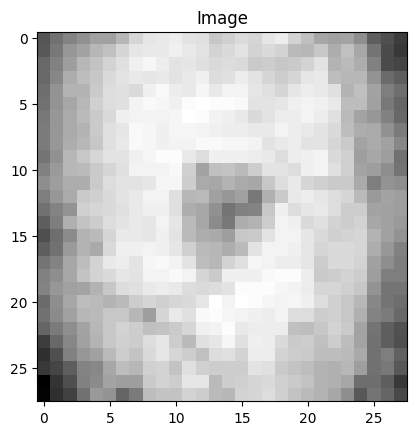

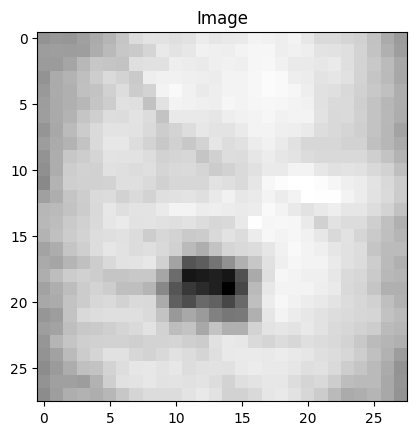

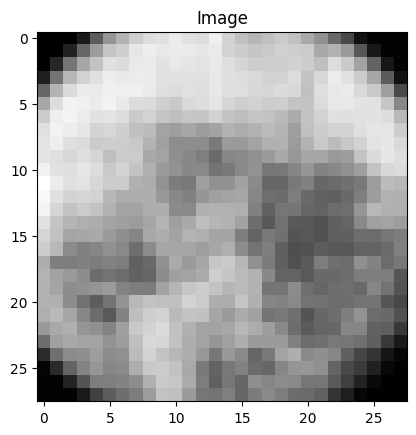

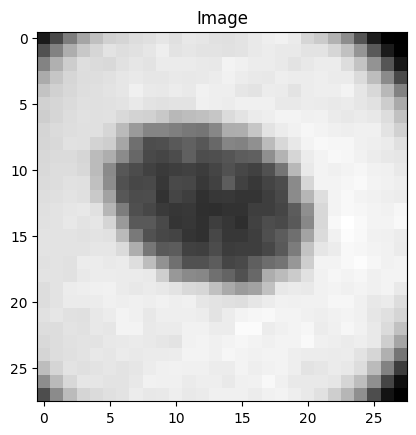

In [325]:
def show_images(idxs):
    for idx in idxs:
        plt.imshow(np.array(data_train_all.iloc[idx].drop([784], axis=0)).reshape((28,28)), cmap="gray")
        plt.title(f"Image")
        plt.show()

show_images([1,2,7000, 8000])

### Prepare testing and training data

In [326]:
X_train = data_train_all.drop([784], axis=1)
X_test = data_test_all.drop([784], axis=1)

y_train = data_train_all[784].values
y_test = data_test_all[784].values

#### Scale the data

In [327]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

In [328]:
X_train_standarded = standard_scaler.fit_transform(X_train)
X_test_transformed = standard_scaler.transform(X_test)

## Get and train the models

### Logistic Regression

In [329]:
from sklearn.linear_model import LogisticRegression

In [330]:
logistic_regression_model = LogisticRegression(solver="lbfgs", max_iter=3000)
logistic_regression_model.fit(X_train_standarded, y_train)

LogisticRegression(max_iter=3000)

In [331]:
y_preds_log = logistic_regression_model.predict(X_test_transformed)
y_preds_log[:10]

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0])

### Gaussian Naive Bayes and Bernoulli Naive Bayes

In [332]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [333]:
gaussianNB, bernoulliNB = GaussianNB(), BernoulliNB()
gaussianNB.fit(X_train_standarded, y_train)

GaussianNB()

In [334]:
bernoulliNB.fit(X_train_standarded, y_train)

BernoulliNB()

In [335]:
y_preds_gnb = gaussianNB.predict(X_test_transformed)
y_preds_bnb = bernoulliNB.predict(X_test_transformed)

y_preds_gnb[:10], y_preds_bnb[:10]

(array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0]), array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0]))

### Decision Tree Classifier

In [336]:
from sklearn.tree import DecisionTreeClassifier

In [337]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train_standarded, y_train)

DecisionTreeClassifier()

In [338]:
y_preds_dtc = decision_tree_classifier.predict(X_test_transformed)
y_preds_dtc[:10]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0])

### Random Forest Classifier

In [339]:
from sklearn.ensemble import RandomForestClassifier

In [340]:
random_forest_classifier = RandomForestClassifier(max_depth=10)
random_forest_classifier.fit(X_train_standarded, y_train)

RandomForestClassifier(max_depth=10)

In [341]:
y_preds_rf = random_forest_classifier.predict(X_test_transformed)
y_preds_rf[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

### Support Vector Classifier

In [342]:
from sklearn.svm import SVC

In [343]:
svc = SVC()
svc.fit(X_train_standarded, y_train)

SVC()

In [344]:
y_preds_svc = svc.predict(X_test_transformed)
y_preds_svc[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

## Check the results

In [345]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [346]:
acc_log = accuracy_score(y_test, y_preds_log) * 100
acc_dtc = accuracy_score(y_test, y_preds_dtc) * 100
acc_gnb = accuracy_score(y_test, y_preds_gnb) * 100
acc_bnb = accuracy_score(y_test, y_preds_bnb) * 100
acc_rf = accuracy_score(y_test, y_preds_rf) * 100
acc_svc = accuracy_score(y_test, y_preds_svc) * 100

print(f"Logistic Regression Model's accuracy is {acc_log:.2f}")
print(f"Decision Tree Classifier Model's accuracy is {acc_dtc:.2f}")
print(f"Gaussian Naive Bayes Model's accuracy is {acc_gnb:.2f}")
print(f"Bernoulli Naive Bayes Model's accuracy is {acc_bnb:.2f}")
print(f"Random Forest Classifier Model's accuracy is {acc_rf:.2f}")
print(f"Support Vector Classifier Model's accuracy is {acc_svc:.2f}")

Logistic Regression Model's accuracy is 82.80
Decision Tree Classifier Model's accuracy is 85.70
Gaussian Naive Bayes Model's accuracy is 75.30
Bernoulli Naive Bayes Model's accuracy is 74.00
Random Forest Classifier Model's accuracy is 88.80
Support Vector Classifier Model's accuracy is 88.80


### Best models to choose are Random Forest Classifier and Support Vector Classifier

In [347]:
import seaborn as sns

In [351]:
cm_rf = confusion_matrix(y_test, y_preds_rf)
cm_rf

array([[466,  34],
       [ 78, 422]])

In [352]:
cm_svc = confusion_matrix(y_test, y_preds_svc)
cm_svc

array([[458,  42],
       [ 70, 430]])

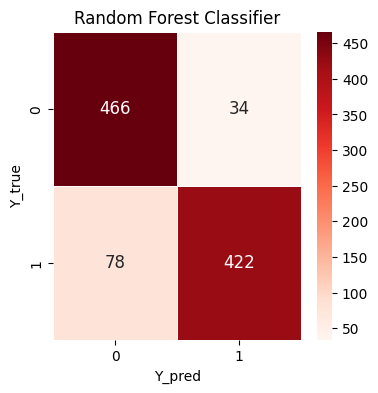

In [353]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_rf, cmap="Reds", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.title("Random Forest Classifier")
plt.show()

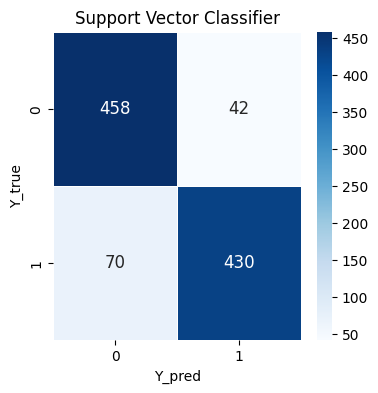

In [354]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm_svc, cmap="Blues", annot=True, fmt="d", annot_kws={"size": 12}, linewidths=0.5)
plt.xlabel("Y_pred")
plt.ylabel("Y_true")
plt.title("Support Vector Classifier")
plt.show()